In [92]:
import sys,os
import xarray as xr
import numpy as np
import scipy as spy
import pickle 

import matplotlib
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.util import add_cyclic_point
from collections import OrderedDict 

import time as timestamp 

In [93]:
import pyLIM_1monthLIM_1monthforecast_allmo_042321 as runexp

In [94]:
valid_stats_allmo = runexp.run_forecast()

Insamp is True
Working on MONTH: 0
Loading truncated tas
Loading truncated tos
Loading truncated sic
working on tas
working on tos
working on sic
0, tas
1, tos
Fraction in first 60 multivariate EOFs = 77.30907320336584
Shape of E: (74752, 60)
0, tas
1, tos
Fraction in first 60 multivariate EOFs = 92.96219658840171
Shape of E: (74752, 60)
Training LIM...
Training LIM with tau = 1, month = 0
Running forecast...
Adjust is True...
YES negative eigenvalue found...adjusting
t= 0
t= 1
Decompressing forecast...
Lag 0
Lag 1
Validating forecast...
tas


KeyboardInterrupt: 

In [ ]:
valid_stats_allmo[0]['tas'].keys()

In [ ]:
limvars = ['tas','tos','sic']
month_names = ['Jan','Feb','Mar','Apr','May','June','July','Aug','Sept','Oct','Nov','Dec']

In [ ]:
valid_stats_1mo = {}

for var in limvars:
    print('Working on '+str(var)+'...')
    corr_plot = np.zeros((11))
    ce_plot = np.zeros((11))
    gm_var_ratio = np.zeros((11))
    v = {}

    for m in range(11):
        corr_plot[m] = valid_stats_allmo[m][var]['corr_tot'][1]**2
        ce_plot[m] = valid_stats_allmo[m][var]['ce_tot'][1]
        gm_var_ratio[m] = valid_stats_allmo[m][var]['gm_var_ratio'][1]

    v['corr2_plot'] = corr_plot
    v['ce_plot'] = ce_plot
    v['gm_var_ratio'] = gm_var_ratio
    valid_stats_1mo[var] = v

In [ ]:
fig,axs = plt.subplots(2,2,figsize=(15,9))
#fig,axs= plt.subplots(2, 2)

ax = axs.flatten()

for i,var in enumerate(limvars):
    ax[i].plot(valid_stats_1mo[var]['gm_var_ratio'])

#    ax[i].set_ylim(0,1)
#    ax[i].set_xlim(0,10)
    ax[i].set_ylim(0,1.3)
    ax[i].set_xticks(np.arange(0,12,1))
    ax[i].set_xticklabels(month_names,fontsize=12)
    ax[i].grid(axis='both')
    ax[i].set_ylabel('GM ratio: \nerror variance to true variance', fontsize=14)
    ax[i].set_title(var, fontsize=16)

plt.suptitle('All months separate LIM: 1 month lag', fontsize=16)    
ax[2].set_xlabel('Training month', fontsize=14)
ax[3].set_xlabel('Training month', fontsize=14)

In [ ]:
fig,axs = plt.subplots(2,2,figsize=(15,9))
#fig,axs= plt.subplots(2, 2)

ax = axs.flatten()

for i,var in enumerate(limvars):
    ax[i].plot(valid_stats_1mo[var]['corr2_plot'], label='Correlation')
    ax[i].plot(valid_stats_1mo[var]['ce_plot'], label='CE')

#    ax[i].set_ylim(0,1)
#    ax[i].set_xlim(0,10)
    ax[i].set_ylim(0,1.01)
    ax[i].set_xticks(np.arange(0,12,1))
    ax[i].set_xticklabels(month_names,fontsize=12)
    ax[i].grid(axis='both')
    ax[i].set_title(var, fontsize=16)

plt.suptitle('All months separate LIM: 1 month lag', fontsize=16)    
ax[2].set_xlabel('Training month', fontsize=14)
ax[3].set_xlabel('Training month', fontsize=14)

In [80]:
import importlib
importlib.reload(runexp)

<module 'pyLIM_1monthLIM_1monthforecast_allmo_042321' from '/home/disk/p/mkb22/Documents/si_analysis_kb/LIMs/SI_LIMs/pyLIM_1monthLIM_1monthforecast_allmo_042321.py'>

In [81]:
Fcast_out = runexp.run_save_forecast()

Insamp is True
Working on MONTH: 0
Loading truncated tas
Loading truncated tos
Loading truncated sic
working on tas
working on tos
working on sic
0, tas
1, tos
Fraction in first 60 multivariate EOFs = 77.30907320336584
Shape of E: (74752, 60)
0, tas
1, tos
Fraction in first 60 multivariate EOFs = 92.96219658840171
Shape of E: (74752, 60)
Training LIM...
Training LIM with tau = 1, month = 0
Running forecast...
Adjust is True...
YES negative eigenvalue found...adjusting
t= 0
t= 1
Decompressing forecast...
Lag 0
Lag 1
Working on MONTH: 1
Loading truncated tas
Loading truncated tos
Loading truncated sic
working on tas
working on tos
working on sic
0, tas
1, tos
Fraction in first 60 multivariate EOFs = 76.12347740906027
Shape of E: (74752, 60)
0, tas
1, tos
Fraction in first 60 multivariate EOFs = 92.6203169541184
Shape of E: (74752, 60)
Training LIM...
Training LIM with tau = 1, month = 1
Running forecast...
Adjust is True...
YES negative eigenvalue found...adjusting
t= 0
t= 1
Decompressin

In [82]:
perc_neg_eig = np.zeros((11))
for m in Fcast_out.keys(): 
    perc_neg_eig[m] = (Fcast_out[m]['LIMd']['lam_L']>0).sum()/len(Fcast_out[m]['LIMd']['lam_L'])

In [83]:
month_names = ['Jan','Feb','Mar','Apr','May','June','July','Aug','Sept','Oct','Nov','Dec']

In [84]:
perc_neg_eig0_9 = perc_neg_eig

Text(1.5,5.5,'limvars=tas,tos,sic, MPI')

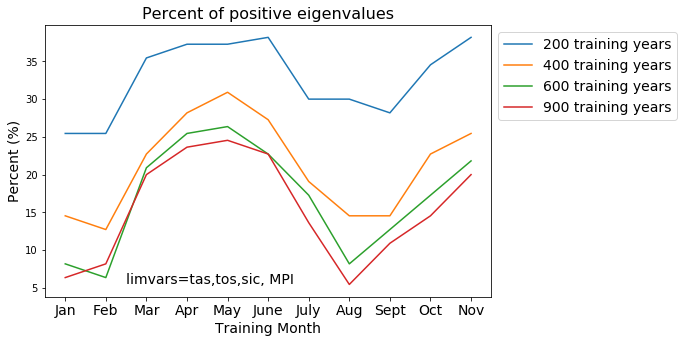

In [91]:
fig = plt.figure(figsize=(8,5))

plt.plot(perc_neg_eig0_2*100, label=str(int(0.2*1000))+' training years')
plt.plot(perc_neg_eig3*100, label=str(int(0.4*1000))+' training years')
plt.plot(perc_neg_eig1*100, label=str(int(0.6*1000))+' training years')
plt.plot(perc_neg_eig0_9*100, label=str(int(0.9*1000))+' training years')


plt.xticks(np.arange(0,11,1),month_names, fontsize=14)
plt.ylabel('Percent (%)', fontsize=14)
plt.xlabel('Training Month', fontsize=14)
plt.title('Percent of positive eigenvalues', fontsize=16)
plt.legend(bbox_to_anchor=(1,1),fontsize=14)

plt.text(1.5,5.5,'limvars=tas,tos,sic, MPI', fontsize=14)

Validating forecast...
tas
removing climotology...
detrending...
(18432, 12000)
(18432, 12000)
Working on month 0
Lag 0
0
Trained using month 0...
Validating against month 0
Truth_anom shape: (18432, 400)
Forecast_anom shape: (18432, 400)


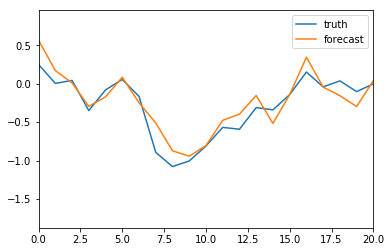

Lag 1
0
Trained using month 0...
Validating against month 1
Truth_anom shape: (18432, 399)
Forecast_anom shape: (18432, 399)


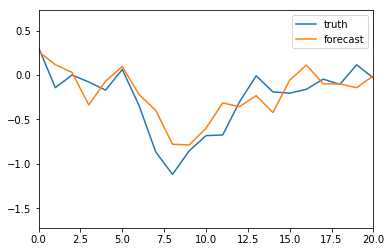

Working on month 1
Lag 0
1
Trained using month 1...
Validating against month 1
Truth_anom shape: (18432, 400)
Forecast_anom shape: (18432, 400)


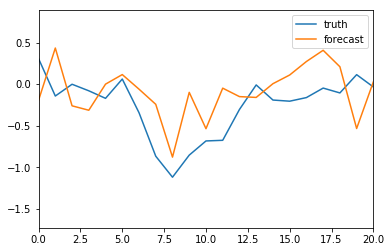

Lag 1
1
Trained using month 1...
Validating against month 2
Truth_anom shape: (18432, 399)
Forecast_anom shape: (18432, 399)


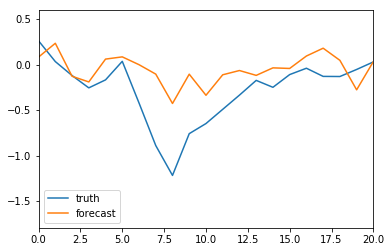

Working on month 2
Lag 0
2
Trained using month 2...
Validating against month 2
Truth_anom shape: (18432, 400)
Forecast_anom shape: (18432, 400)


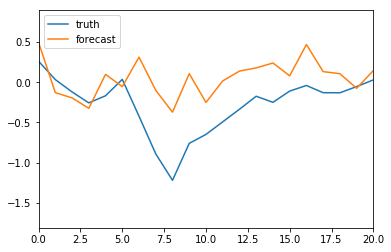

Lag 1
2
Trained using month 2...
Validating against month 3
Truth_anom shape: (18432, 399)
Forecast_anom shape: (18432, 399)


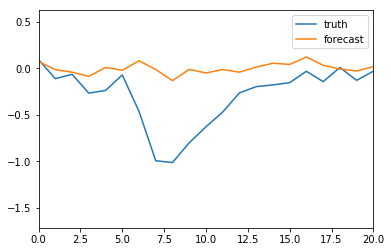

Working on month 3
Lag 0
3
Trained using month 3...
Validating against month 3
Truth_anom shape: (18432, 400)
Forecast_anom shape: (18432, 400)


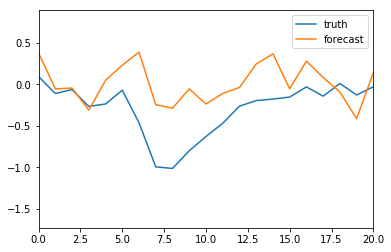

Lag 1
3
Trained using month 3...
Validating against month 4
Truth_anom shape: (18432, 399)
Forecast_anom shape: (18432, 399)


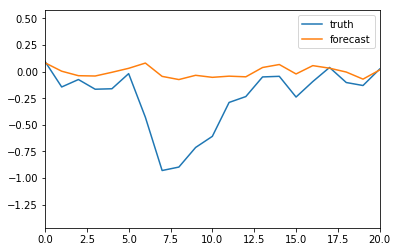

Working on month 4
Lag 0
4
Trained using month 4...
Validating against month 4
Truth_anom shape: (18432, 400)
Forecast_anom shape: (18432, 400)


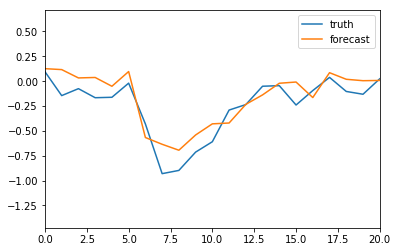

Lag 1
4
Trained using month 4...
Validating against month 5
Truth_anom shape: (18432, 399)
Forecast_anom shape: (18432, 399)


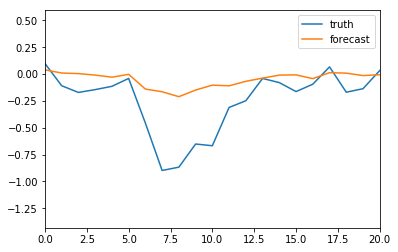

Working on month 5
Lag 0
5
Trained using month 5...
Validating against month 5
Truth_anom shape: (18432, 400)
Forecast_anom shape: (18432, 400)


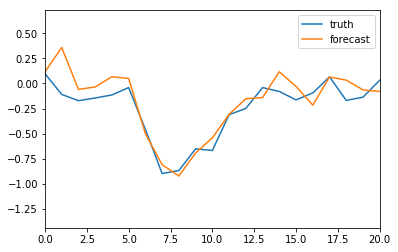

Lag 1
5
Trained using month 5...
Validating against month 6
Truth_anom shape: (18432, 399)
Forecast_anom shape: (18432, 399)


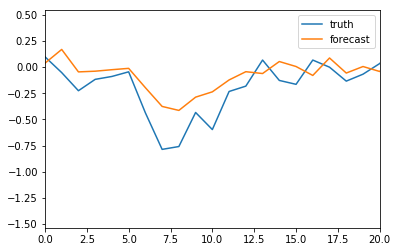

Working on month 6
Lag 0
6
Trained using month 6...
Validating against month 6
Truth_anom shape: (18432, 400)
Forecast_anom shape: (18432, 400)


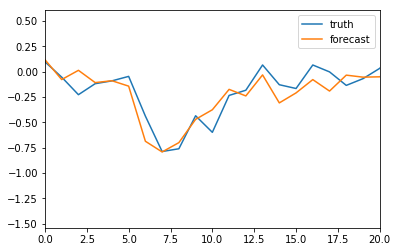

Lag 1
6
Trained using month 6...
Validating against month 7
Truth_anom shape: (18432, 399)
Forecast_anom shape: (18432, 399)


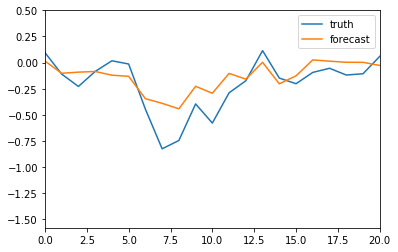

Working on month 7
Lag 0
7
Trained using month 7...
Validating against month 7
Truth_anom shape: (18432, 400)
Forecast_anom shape: (18432, 400)


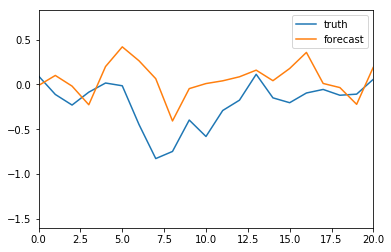

Lag 1
7
Trained using month 7...
Validating against month 8
Truth_anom shape: (18432, 399)
Forecast_anom shape: (18432, 399)


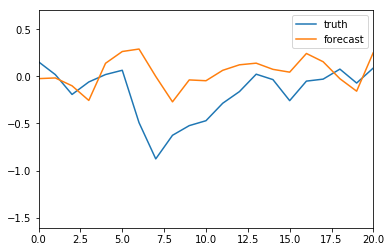

Working on month 8
Lag 0
8
Trained using month 8...
Validating against month 8
Truth_anom shape: (18432, 400)
Forecast_anom shape: (18432, 400)


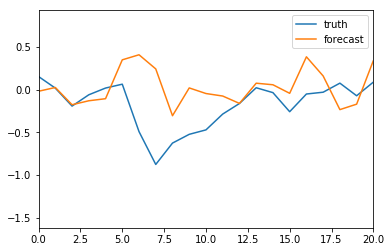

Lag 1
8
Trained using month 8...
Validating against month 9
Truth_anom shape: (18432, 399)
Forecast_anom shape: (18432, 399)


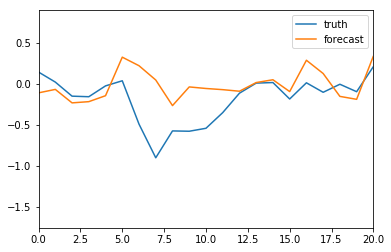

Working on month 9
Lag 0
9
Trained using month 9...
Validating against month 9
Truth_anom shape: (18432, 400)
Forecast_anom shape: (18432, 400)


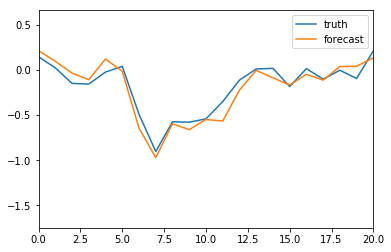

Lag 1
9
Trained using month 9...
Validating against month 10
Truth_anom shape: (18432, 399)
Forecast_anom shape: (18432, 399)


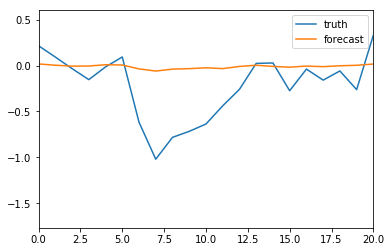

Working on month 10
Lag 0
10
Trained using month 10...
Validating against month 10
Truth_anom shape: (18432, 400)
Forecast_anom shape: (18432, 400)


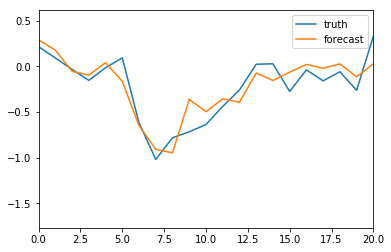

Lag 1
10
Trained using month 10...
Validating against month 11
Truth_anom shape: (18432, 399)
Forecast_anom shape: (18432, 399)


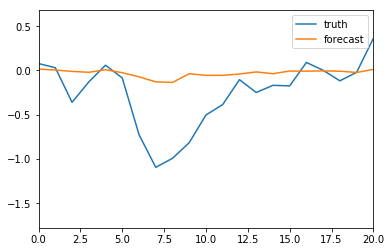

tos
removing climotology...
detrending...
(56320, 12000)
(56320, 12000)
Working on month 0
Lag 0
0
Trained using month 0...
Validating against month 0
Truth_anom shape: (56320, 400)
Forecast_anom shape: (56320, 400)


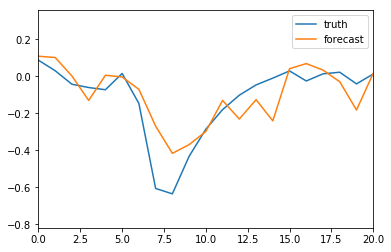

Lag 1
0
Trained using month 0...
Validating against month 1
Truth_anom shape: (56320, 399)
Forecast_anom shape: (56320, 399)


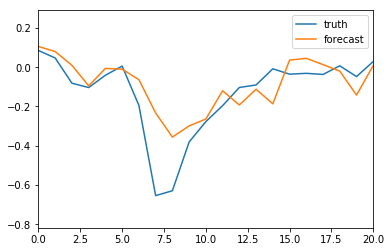

Working on month 1
Lag 0
1
Trained using month 1...
Validating against month 1
Truth_anom shape: (56320, 400)
Forecast_anom shape: (56320, 400)


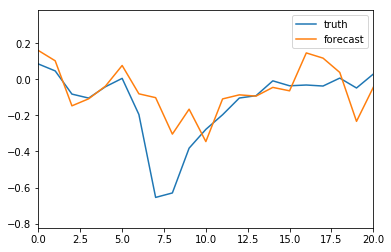

Lag 1
1
Trained using month 1...
Validating against month 2
Truth_anom shape: (56320, 399)
Forecast_anom shape: (56320, 399)


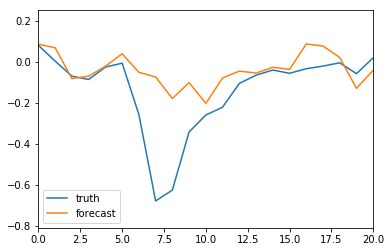

Working on month 2
Lag 0
2
Trained using month 2...
Validating against month 2
Truth_anom shape: (56320, 400)
Forecast_anom shape: (56320, 400)


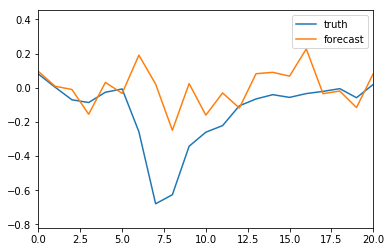

Lag 1
2
Trained using month 2...
Validating against month 3
Truth_anom shape: (56320, 399)
Forecast_anom shape: (56320, 399)


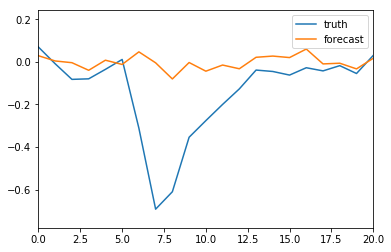

Working on month 3
Lag 0
3
Trained using month 3...
Validating against month 3
Truth_anom shape: (56320, 400)
Forecast_anom shape: (56320, 400)


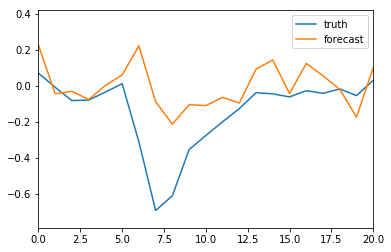

Lag 1
3
Trained using month 3...
Validating against month 4
Truth_anom shape: (56320, 399)
Forecast_anom shape: (56320, 399)


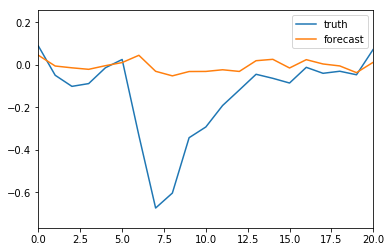

Working on month 4
Lag 0
4
Trained using month 4...
Validating against month 4
Truth_anom shape: (56320, 400)
Forecast_anom shape: (56320, 400)


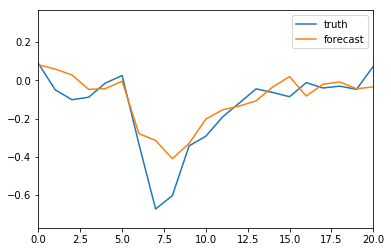

Lag 1
4
Trained using month 4...
Validating against month 5
Truth_anom shape: (56320, 399)
Forecast_anom shape: (56320, 399)


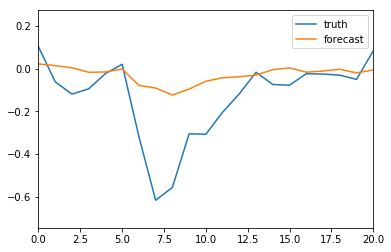

Working on month 5
Lag 0
5
Trained using month 5...
Validating against month 5
Truth_anom shape: (56320, 400)
Forecast_anom shape: (56320, 400)


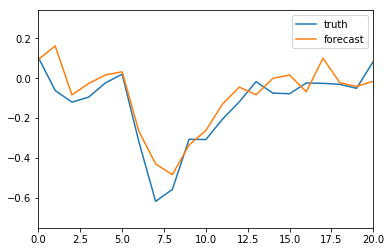

Lag 1
5
Trained using month 5...
Validating against month 6
Truth_anom shape: (56320, 399)
Forecast_anom shape: (56320, 399)


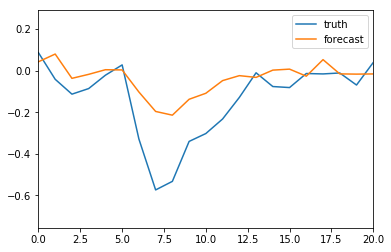

Working on month 6
Lag 0
6
Trained using month 6...
Validating against month 6
Truth_anom shape: (56320, 400)
Forecast_anom shape: (56320, 400)


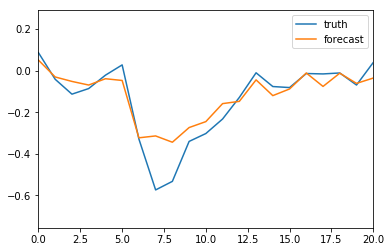

Lag 1
6
Trained using month 6...
Validating against month 7
Truth_anom shape: (56320, 399)
Forecast_anom shape: (56320, 399)


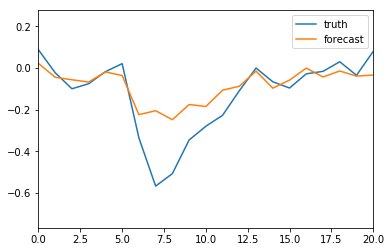

Working on month 7
Lag 0
7
Trained using month 7...
Validating against month 7
Truth_anom shape: (56320, 400)
Forecast_anom shape: (56320, 400)


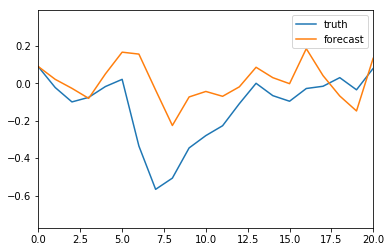

Lag 1
7
Trained using month 7...
Validating against month 8
Truth_anom shape: (56320, 399)
Forecast_anom shape: (56320, 399)


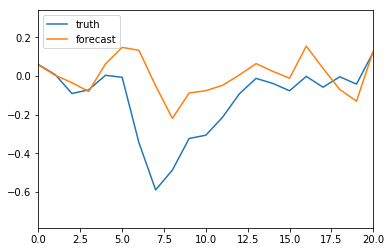

Working on month 8
Lag 0
8
Trained using month 8...
Validating against month 8
Truth_anom shape: (56320, 400)
Forecast_anom shape: (56320, 400)


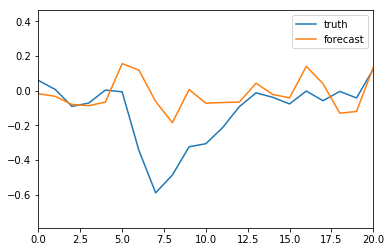

Lag 1
8
Trained using month 8...
Validating against month 9
Truth_anom shape: (56320, 399)
Forecast_anom shape: (56320, 399)


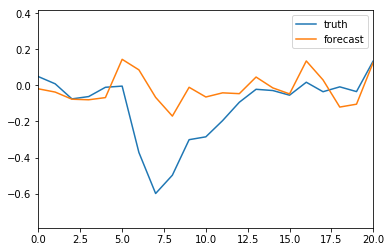

Working on month 9
Lag 0
9
Trained using month 9...
Validating against month 9
Truth_anom shape: (56320, 400)
Forecast_anom shape: (56320, 400)


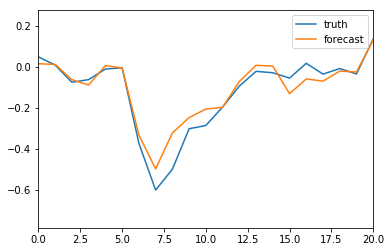

Lag 1
9
Trained using month 9...
Validating against month 10
Truth_anom shape: (56320, 399)
Forecast_anom shape: (56320, 399)


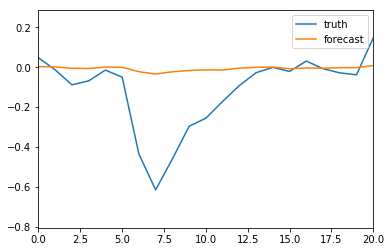

Working on month 10
Lag 0
10
Trained using month 10...
Validating against month 10
Truth_anom shape: (56320, 400)
Forecast_anom shape: (56320, 400)


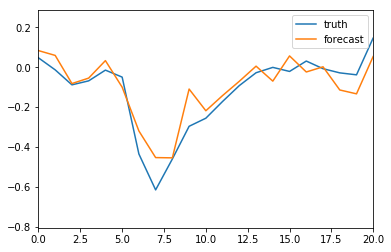

Lag 1
10
Trained using month 10...
Validating against month 11
Truth_anom shape: (56320, 399)
Forecast_anom shape: (56320, 399)


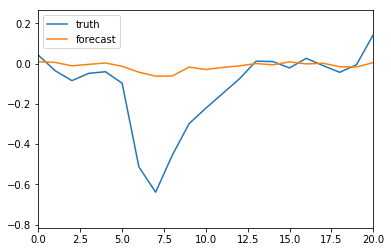

sic
removing climotology...
detrending...
(56320, 12000)
(56320, 12000)
Working on month 0
Lag 0
0
Trained using month 0...
Validating against month 0
Truth_anom shape: (56320, 400)
Forecast_anom shape: (56320, 400)


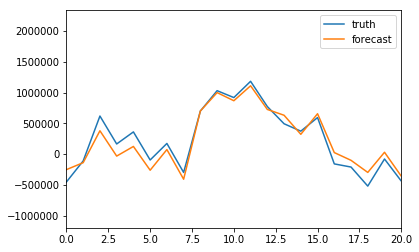

Lag 1
0
Trained using month 0...
Validating against month 1
Truth_anom shape: (56320, 399)
Forecast_anom shape: (56320, 399)


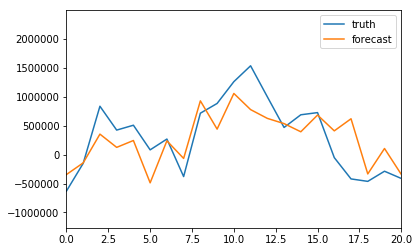

Working on month 1
Lag 0
1
Trained using month 1...
Validating against month 1
Truth_anom shape: (56320, 400)
Forecast_anom shape: (56320, 400)


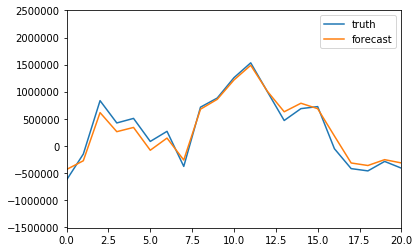

Lag 1
1
Trained using month 1...
Validating against month 2
Truth_anom shape: (56320, 399)
Forecast_anom shape: (56320, 399)


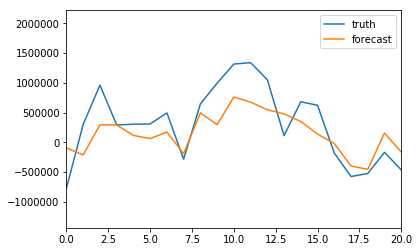

Working on month 2
Lag 0
2
Trained using month 2...
Validating against month 2
Truth_anom shape: (56320, 400)
Forecast_anom shape: (56320, 400)


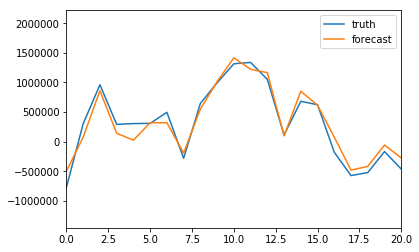

Lag 1
2
Trained using month 2...
Validating against month 3
Truth_anom shape: (56320, 399)
Forecast_anom shape: (56320, 399)


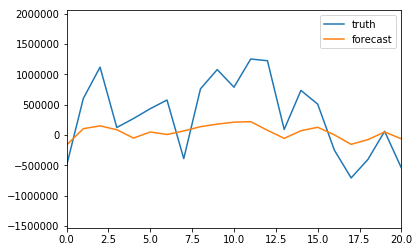

Working on month 3
Lag 0
3
Trained using month 3...
Validating against month 3
Truth_anom shape: (56320, 400)
Forecast_anom shape: (56320, 400)


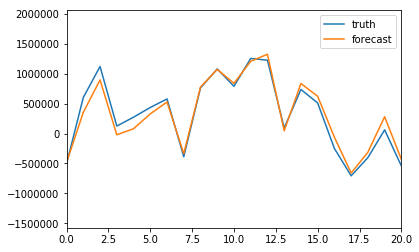

Lag 1
3
Trained using month 3...
Validating against month 4
Truth_anom shape: (56320, 399)
Forecast_anom shape: (56320, 399)


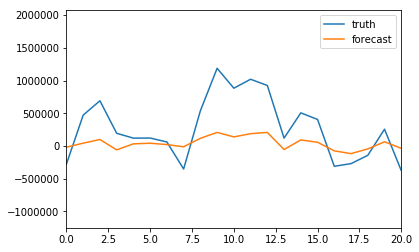

Working on month 4
Lag 0
4
Trained using month 4...
Validating against month 4
Truth_anom shape: (56320, 400)
Forecast_anom shape: (56320, 400)


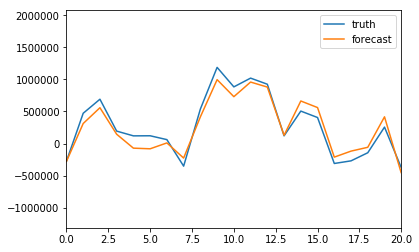

Lag 1
4
Trained using month 4...
Validating against month 5
Truth_anom shape: (56320, 399)
Forecast_anom shape: (56320, 399)


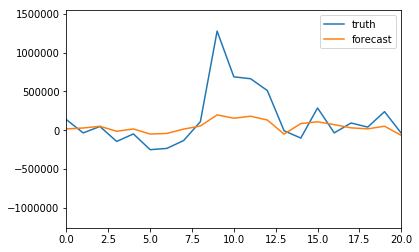

Working on month 5
Lag 0
5
Trained using month 5...
Validating against month 5
Truth_anom shape: (56320, 400)
Forecast_anom shape: (56320, 400)


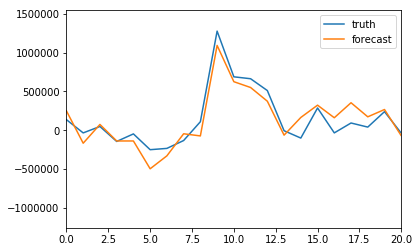

Lag 1
5
Trained using month 5...
Validating against month 6
Truth_anom shape: (56320, 399)
Forecast_anom shape: (56320, 399)


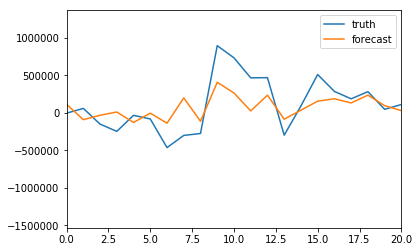

Working on month 6
Lag 0
6
Trained using month 6...
Validating against month 6
Truth_anom shape: (56320, 400)
Forecast_anom shape: (56320, 400)


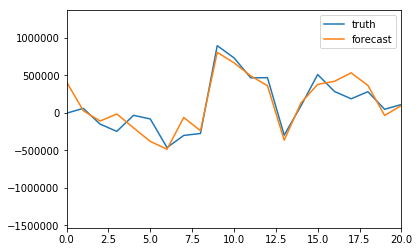

Lag 1
6
Trained using month 6...
Validating against month 7
Truth_anom shape: (56320, 399)
Forecast_anom shape: (56320, 399)


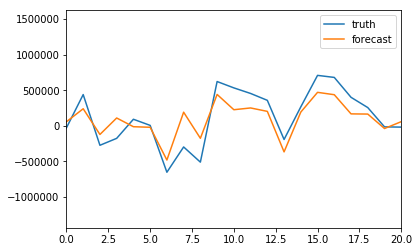

Working on month 7
Lag 0
7
Trained using month 7...
Validating against month 7
Truth_anom shape: (56320, 400)
Forecast_anom shape: (56320, 400)


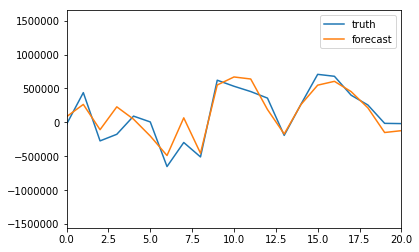

Lag 1
7
Trained using month 7...
Validating against month 8
Truth_anom shape: (56320, 399)
Forecast_anom shape: (56320, 399)


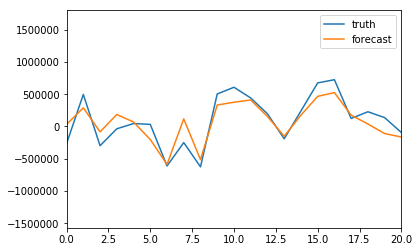

Working on month 8
Lag 0
8
Trained using month 8...
Validating against month 8
Truth_anom shape: (56320, 400)
Forecast_anom shape: (56320, 400)


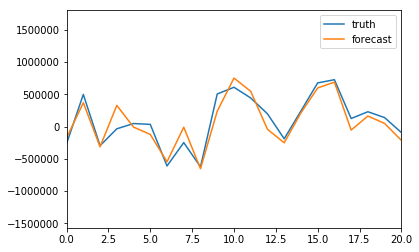

Lag 1
8
Trained using month 8...
Validating against month 9
Truth_anom shape: (56320, 399)
Forecast_anom shape: (56320, 399)


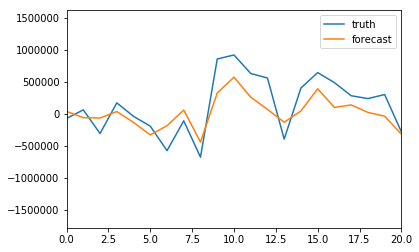

Working on month 9
Lag 0
9
Trained using month 9...
Validating against month 9
Truth_anom shape: (56320, 400)
Forecast_anom shape: (56320, 400)


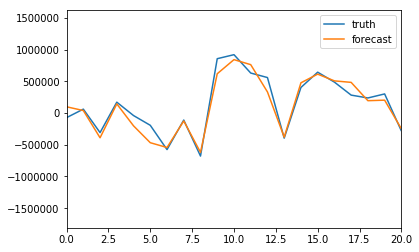

Lag 1
9
Trained using month 9...
Validating against month 10
Truth_anom shape: (56320, 399)
Forecast_anom shape: (56320, 399)


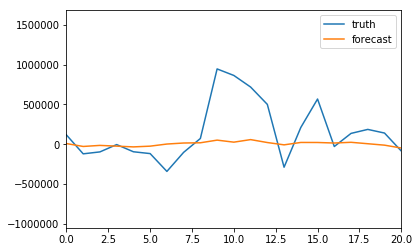

Working on month 10
Lag 0
10
Trained using month 10...
Validating against month 10
Truth_anom shape: (56320, 400)
Forecast_anom shape: (56320, 400)


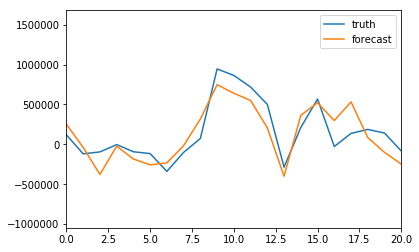

Lag 1
10
Trained using month 10...
Validating against month 11
Truth_anom shape: (56320, 399)
Forecast_anom shape: (56320, 399)


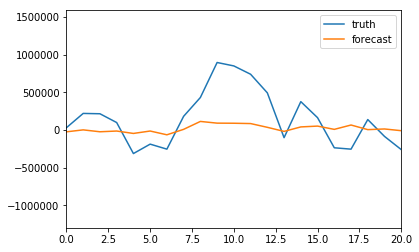

In [28]:
valid_stats_allmo = runexp.run_validation(Fcast_out)

In [29]:
valid_stats_1mo = {}
limvars = ['tas','tos','sic']

for var in limvars:
    print('Working on '+str(var)+'...')
    corr_plot = np.zeros((11))
    ce_plot = np.zeros((11))
    gm_var_ratio = np.zeros((11))
    v = {}

    for m in range(11):
        corr_plot[m] = valid_stats_allmo[var][m]['corr_tot'][1]**2
        ce_plot[m] = valid_stats_allmo[var][m]['ce_tot'][1]
        gm_var_ratio[m] = valid_stats_allmo[var][m]['gm_var_ratio'][1]

    v['corr2_plot'] = corr_plot
    v['ce_plot'] = ce_plot
    v['gm_var_ratio'] = gm_var_ratio
    valid_stats_1mo[var] = v

Working on tas...


KeyError: 0

In [30]:
for var in limvars:
    print(valid_stats_1mo[var]['gm_var_ratio'])

KeyError: 'tas'

Text(0.5,0,'Training month')

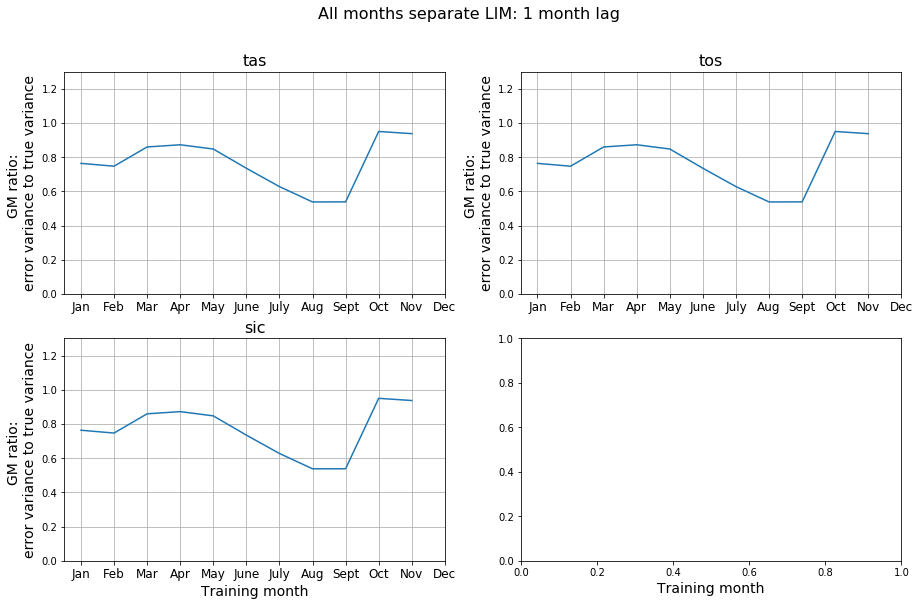

In [24]:
fig,axs = plt.subplots(2,2,figsize=(15,9))
#fig,axs= plt.subplots(2, 2)

ax = axs.flatten()

for i,var in enumerate(limvars):
    ax[i].plot(valid_stats_1mo[var]['gm_var_ratio'])

#    ax[i].set_ylim(0,1)
#    ax[i].set_xlim(0,10)
    ax[i].set_ylim(0,1.3)
    ax[i].set_xticks(np.arange(0,12,1))
    ax[i].set_xticklabels(month_names,fontsize=12)
    ax[i].grid(axis='both')
    ax[i].set_ylabel('GM ratio: \nerror variance to true variance', fontsize=14)
    ax[i].set_title(var, fontsize=16)

plt.suptitle('All months separate LIM: 1 month lag', fontsize=16)    
ax[2].set_xlabel('Training month', fontsize=14)
ax[3].set_xlabel('Training month', fontsize=14)

Text(0.5,0,'Training month')

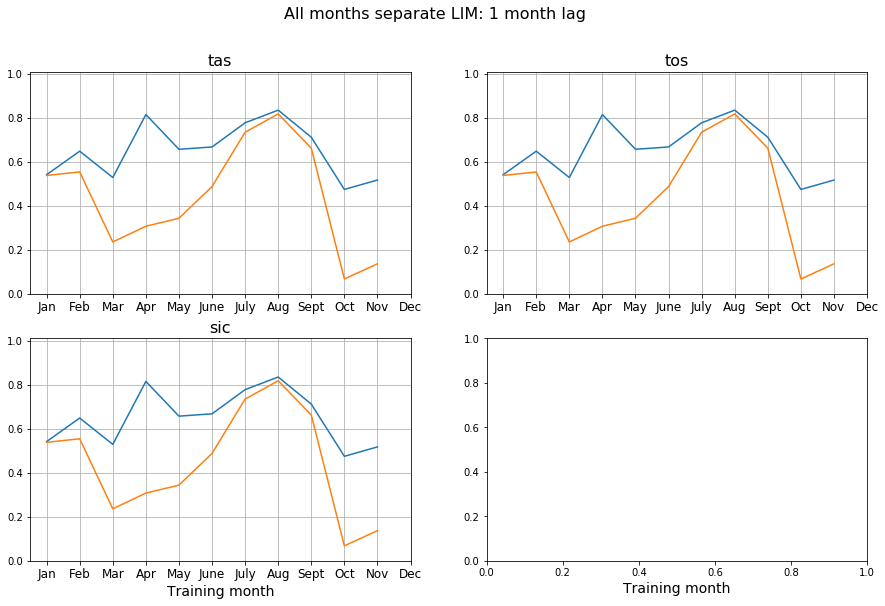

In [25]:
fig,axs = plt.subplots(2,2,figsize=(15,9))
#fig,axs= plt.subplots(2, 2)

ax = axs.flatten()

for i,var in enumerate(limvars):
    ax[i].plot(valid_stats_1mo[var]['corr2_plot'], label='Correlation')
    ax[i].plot(valid_stats_1mo[var]['ce_plot'], label='CE')

#    ax[i].set_ylim(0,1)
#    ax[i].set_xlim(0,10)
    ax[i].set_ylim(0,1.01)
    ax[i].set_xticks(np.arange(0,12,1))
    ax[i].set_xticklabels(month_names,fontsize=12)
    ax[i].grid(axis='both')
    ax[i].set_title(var, fontsize=16)

plt.suptitle('All months separate LIM: 1 month lag', fontsize=16)    
ax[2].set_xlabel('Training month', fontsize=14)
ax[3].set_xlabel('Training month', fontsize=14)

In [1]:
from scipy.io import loadmat
x = loadmat('/home/disk/eos8/ed/seaice_data/area_nh_ps.mat')

In [4]:
x['data2'].shape

(304, 448)

In [5]:
x

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Wed Oct  7 17:09:16 2020',
 '__version__': '1.0',
 '__globals__': [],
 'data2': array([[382.659, 383.765, 384.872, ..., 406.945, 405.846, 404.746],
        [383.385, 384.494, 385.604, ..., 407.74 , 406.638, 405.536],
        [384.108, 385.221, 386.333, ..., 408.533, 407.428, 406.322],
        ...,
        [386.973, 388.099, 389.224, ..., 411.675, 410.557, 409.439],
        [386.261, 387.383, 388.505, ..., 410.894, 409.779, 408.664],
        [385.546, 386.665, 387.784, ..., 410.11 , 408.999, 407.886]],
       dtype=float32)}